In [1]:
from numpy.random import normal
import matplotlib.pyplot as plt

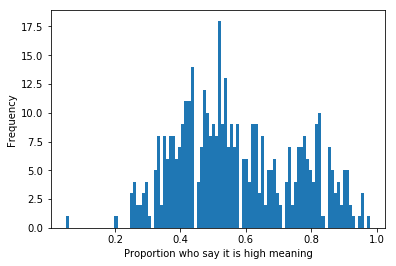

In [2]:
import pandas as pd

payscale_df = pd.read_csv('data/01 - cleaned data/dPayscale.csv')
plt.hist(payscale_df['High Meaning'], bins=100)
plt.xlabel("Proportion who say it is high meaning")
plt.ylabel("Frequency")
plt.show()

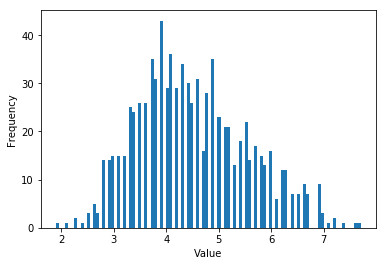

In [3]:
prestige_df = pd.read_csv('data/01 - cleaned data/dPrestige.csv')
prestige_df.rename(columns = {'Mean': 'Prestige'}, inplace=True)
prestige_df['SOC code'] = prestige_df['SOC code'].map(lambda SOC_code: str(SOC_code) + '.00')
prestige_df.sort_values(['Prestige'], ascending=False)

plt.hist(prestige_df['Prestige'], bins=100)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

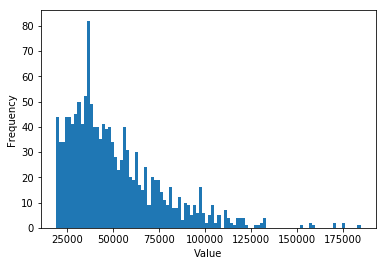

In [4]:
wage_df = pd.read_csv('data/01 - cleaned data/dWage_BLS.csv')
wage_df['SOC code'] = wage_df['SOC code'].map(lambda SOC_code: str(SOC_code) + '.00')

plt.hist(wage_df['Wage_BLS'], bins=100)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

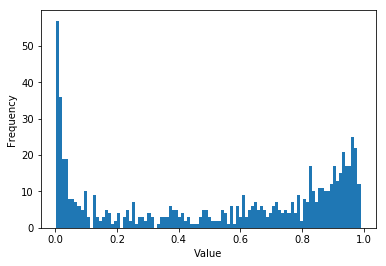

In [5]:
automation_risk_df = pd.read_csv('data/01 - cleaned data/dRiskOfAutomation.csv')
automation_risk_df['SOC code'] = automation_risk_df['SOC code'].map(lambda SOC_code: str(SOC_code) + '.00')

plt.hist(automation_risk_df['RiskOfAutomation'], bins=100)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

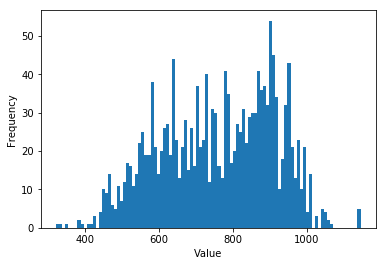

In [6]:
skills_df = pd.read_csv('data/04 - occupation scores inferred from skill/score_Occupation_infered from skills.csv')
skills_df.rename(columns = {'SOC code (occupation label)': 'SOC code'}, inplace=True)
skills_df.rename(columns = {'score (mean of the 4)': 'skill_score'}, inplace=True)

plt.hist(skills_df['skill_score'], bins=100)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [7]:
soc_name_df = pd.read_csv('data/00/All_Career_Clusters.csv')
soc_name_df.rename(columns = {'Code': 'SOC code'}, inplace=True)

In [19]:
# High meaning, bls wage, prestige, outlook, time to enter

aggregate_df = (wage_df.merge(payscale_df,  on='SOC code')
    .merge(soc_name_df, on='SOC code')
    .merge(prestige_df, on='SOC code')
    .merge(automation_risk_df, on='SOC code')
    .merge(skills_df, on='SOC code')
    .drop_duplicates(subset='Occupation_y') # TODO: Why is this necessary?
    [['SOC code', 'Occupation_x', 'Occupation_y', 'Wage_BLS', 'High Meaning', 'Prestige', 'RiskOfAutomation', 'skill_score']])

from ipywidgets import *
from IPython.display import display

def filter_jobs(aggregate_df, meaning, prestige, automation_risk, wage, skill_score):
    return aggregate_df[
        (aggregate_df['High Meaning'] >= meaning) & 
        (aggregate_df['Prestige'] >= prestige) & 
        (aggregate_df['RiskOfAutomation'] <= automation_risk) &
        (aggregate_df['Wage_BLS'] >= wage) &
        (aggregate_df['skill_score'] >= skill_score)
    ]

def on_change(meaning, prestige, automation_risk, wage, skill_score):
    jobs = filter_jobs(aggregate_df, meaning, prestige, automation_risk, wage, skill_score)
    number_of_jobs = jobs['SOC code'].count()
    display("Number of jobs found: {}".format(number_of_jobs))
    display(jobs)

slider_widget = interactive(
    on_change,
    meaning=FloatSlider(min=0.0, max=1.0, value=0.7),
    prestige=FloatSlider(min=0.0, max=8.0, value=5),
    automation_risk=FloatSlider(min=0.0, max=1.0, value=0.3),
    wage=IntSlider(min=0, max=200000, step=10000, value=50000),
    skill_score=IntSlider(min=0, max=1200))

display(slider_widget)


'Number of jobs found: 242'

,SOC code,Occupation_x,Occupation_y,Wage_BLS,High Meaning,Prestige,RiskOfAutomation,skill_score
0,11-1011.00,Chief Executives,business entrepreneur,175110,0.74,5.8,0.015,1145.386995
5,11-1011.00,Chief Executives,college or university president,175110,0.74,7.1,0.015,1145.386995
10,11-1011.00,Chief Executives,department head in a state government,175110,0.74,6.6,0.015,1145.386995
15,11-1011.00,Chief Executives,mayor of a large city,175110,0.74,7.2,0.015,1145.386995
20,11-1011.00,Chief Executives,member of the board of directors of a large co...,175110,0.74,6.9,0.015,1145.386995
25,11-1011.00,Chief Executives,owner of a computer software company,175110,0.74,6.2,0.015,1145.386995
150,11-1021.00,General and Operations Managers,general manager of a manufacturing plant,97730,0.57,5.4,0.160,951.785277
152,11-1021.00,General and Operations Managers,manager,97730,0.57,5.2,0.160,951.785277
154,11-1021.00,General and Operations Managers,manager of a local tv station,97730,0.57,5.8,0.160,951.785277
156,11-1021.00,General and Operations Managers,manager of a mail order house,97730,0.57,4.2,0.160,951.785277
